# Pandas

## Reading data


In [41]:
import pandas as pd

### Data sources
* Can be a local file
* Can be the internet
* Can be a database server
* Formats: csv, excel, stata, etc.

In [42]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [43]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [44]:
drinks['total_serving'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_serving
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,275
2,Algeria,25,0,14,0.7,Africa,39
3,Andorra,245,138,312,12.4,Europe,695
4,Angola,217,57,45,5.9,Africa,319


In [45]:
drinks = drinks.drop(['total_serving'], axis=1)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [46]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [47]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [48]:

# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [49]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


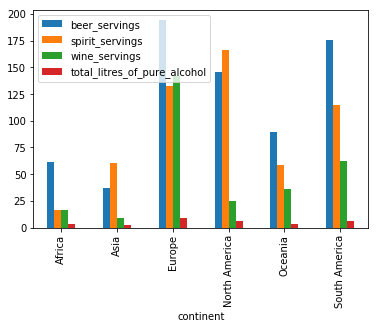

In [50]:
%matplotlib inline
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

### Data can be read from a local file

In [16]:
countries = pd.read_csv('./data/energy_countries.csv')

In [17]:
countries.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,...,0.189937,0.190059,0.193546,0.299774,5.464716,5.661788,6.855850,6.889753,6.927502,6.726748
1,Afghanistan,AFG,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,...,37.137249,33.862579,21.343708,17.813855,14.839806,11.482706,13.973586,16.334293,19.314269,18.423477
2,Angola,AGO,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,...,65.022564,61.599704,58.107975,55.748977,54.193837,52.715679,52.245736,50.686116,50.797461,49.568210
3,Albania,ALB,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,...,31.710195,32.100937,35.912906,37.216638,37.115330,35.962532,40.048300,41.288974,38.689501,38.615210
4,Andorra,AND,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,...,17.485994,16.940777,17.422741,17.515948,19.090730,18.971546,19.195529,19.563698,19.886323,19.747809


In [18]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 28 columns):
Country Name    264 non-null object
Country Code    264 non-null object
1990            243 non-null float64
1991            244 non-null float64
1992            249 non-null float64
1993            249 non-null float64
1994            249 non-null float64
1995            250 non-null float64
1996            250 non-null float64
1997            250 non-null float64
1998            250 non-null float64
1999            250 non-null float64
2000            253 non-null float64
2001            253 non-null float64
2002            255 non-null float64
2003            255 non-null float64
2004            255 non-null float64
2005            256 non-null float64
2006            256 non-null float64
2007            257 non-null float64
2008            257 non-null float64
2009            257 non-null float64
2010            257 non-null float64
2011            257 non-null float64
2012     

In [19]:
countries.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,243.000000,244.000000,249.000000,249.000000,249.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,256.000000,257.000000,257.000000,257.000000,257.000000,257.000000,259.000000,259.000000,259.000000,259.000000
mean,32.238493,32.414994,32.406004,32.580640,32.625044,32.639910,32.376932,31.890885,31.659348,31.682712,...,30.443928,29.876629,29.876437,29.933282,29.809837,29.535514,29.305795,29.588208,29.462282,29.283659
std,32.112058,32.168790,32.105714,31.984518,31.752217,31.584763,31.326573,30.980177,30.789637,30.586986,...,29.930097,29.541385,29.517518,29.320337,28.958250,28.636011,28.228780,28.081945,27.802805,27.589568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.355922,3.706777,3.720297,4.038096,3.866873,3.935620,3.707682,3.908070,4.102626,4.280176,...,5.271696,4.682484,5.153669,5.049517,5.486491,5.568846,5.453135,5.982643,6.343500,6.602640
50%,21.923180,22.078946,21.532053,21.803059,23.861375,22.801206,21.411141,21.279997,21.642621,21.508762,...,18.652987,18.565252,18.549255,18.549136,19.568847,18.586433,18.282297,20.228269,19.886323,19.747809
75%,58.833614,59.033007,58.585676,58.166853,57.260186,59.569145,58.768713,56.050093,54.772753,55.994699,...,49.569808,50.109376,50.947866,49.908159,49.778786,48.655365,48.392668,49.101499,46.610060,45.904689
max,98.163527,98.303706,98.228176,98.173799,98.123684,98.138524,98.088584,97.923782,97.601224,97.300358,...,97.332865,97.171723,96.965441,97.018891,96.827822,96.594207,95.528369,94.230450,94.598183,95.817700


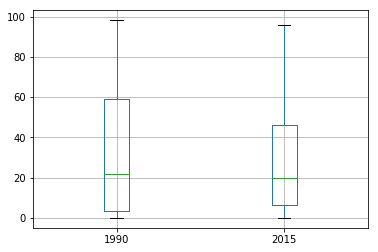

In [20]:
countries[['1990', '2015']].boxplot()

In [24]:
null_idx = countries.isnull().any(axis=1)
countries[null_idx]

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
36,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Eritrea,ERI,NaN,NaN,89.820075,83.565834,80.093880,77.891268,76.377146,77.601167,...,78.562244,80.023349,81.898470,81.806095,81.246599,80.751448,80.229898,80.233144,79.930150,79.767472
77,"Micronesia, Fed. Sts.",FSM,NaN,NaN,1.461362,1.551319,1.478206,1.405025,1.491530,1.492562,...,1.253924,1.209981,1.350395,1.146705,1.500334,1.427524,1.322911,1.249307,1.157990,1.196238
106,Isle of Man,IMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.752040,3.341134,3.397279,4.250318,4.047555,4.386402,6.427508,3.737466,3.812707,4.207590
108,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Cambodia,KHM,NaN,NaN,NaN,NaN,NaN,82.534252,82.766288,82.196256,...,73.855804,69.365725,67.999186,71.321937,68.518468,68.161745,68.260373,68.972156,68.007910,64.923776
135,Liechtenstein,LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54.475850,54.200260,58.990029,58.694467,61.432882,61.921725,60.468792,62.592026,63.134441
145,St. Martin (French part),MAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Monaco,MCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Marshall Islands,MHL,NaN,NaN,19.340256,18.996735,19.442125,19.381562,19.626871,19.691500,...,16.962498,15.212494,14.775363,13.962998,13.308761,12.059831,12.012820,12.067992,12.018998,11.164485


In [25]:
countries[null_idx].count()

Country Name    21
Country Code    21
1990             0
1991             1
1992             6
1993             6
1994             6
1995             7
1996             7
1997             7
1998             7
1999             7
2000            10
2001            10
2002            12
2003            12
2004            12
2005            13
2006            13
2007            14
2008            14
2009            14
2010            14
2011            14
2012            16
2013            16
2014            16
2015            16
dtype: int64

* fill blanks
* replace nan
* create new rows
* delete rows
* histograms
* correlations

In [27]:
countries.median()

1990    21.923180
1991    22.078946
1992    21.532053
1993    21.803059
1994    23.861375
1995    22.801206
1996    21.411141
1997    21.279997
1998    21.642621
1999    21.508762
2000    21.733829
2001    20.949809
2002    20.916598
2003    20.344396
2004    20.249479
2005    19.993938
2006    18.652987
2007    18.565252
2008    18.549255
2009    18.549136
2010    19.568847
2011    18.586433
2012    18.282297
2013    20.228269
2014    19.886323
2015    19.747809
dtype: float64

### Custom reading

In [36]:
# Example mlbook california

 Example taken from:

<img src="assets/images/geron.jpg" width="200" height="200">


In [51]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [52]:
fetch_housing_data()

In [53]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [54]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


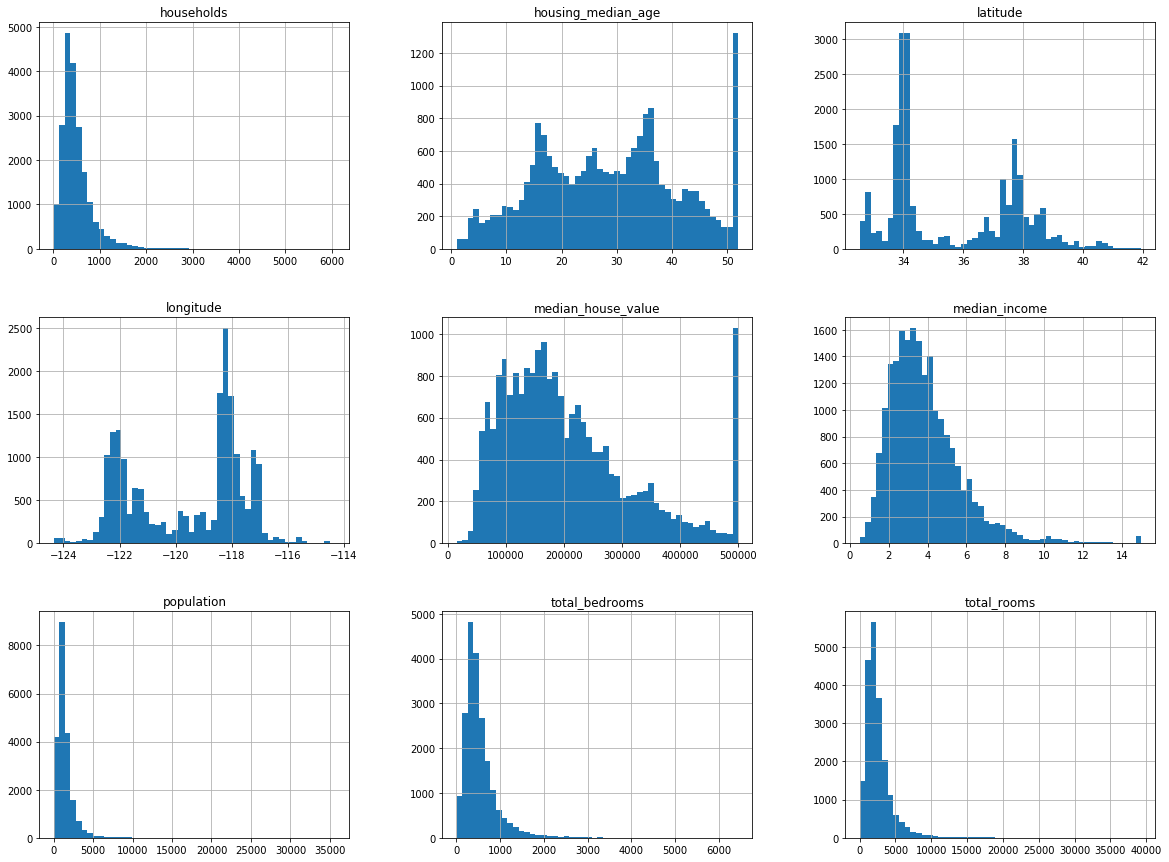

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

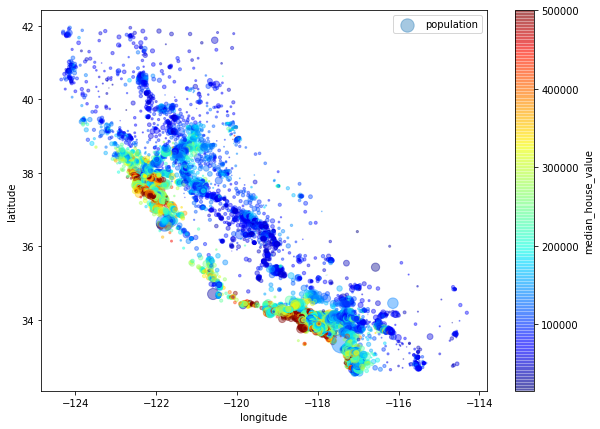

In [63]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


In [59]:
corr_matrix = housing.corr()

In [60]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff19d88e390>,
      dtype=object)

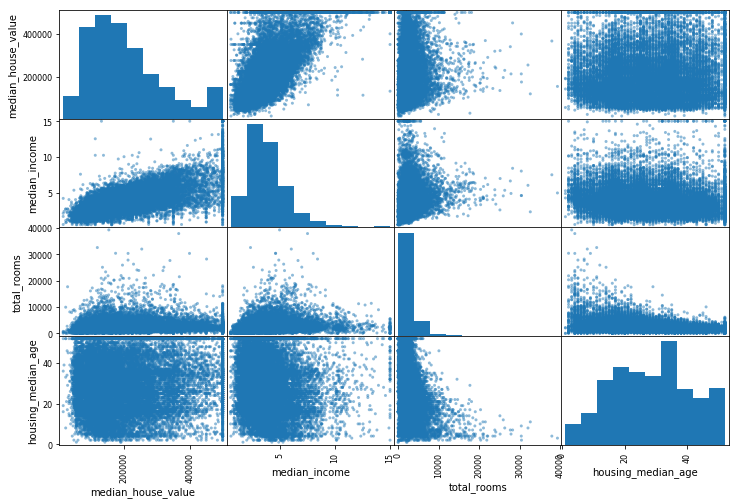

In [62]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


In [67]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [68]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [69]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY
